In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from collections import Counter
from soyspacing.countbase import CountSpace

In [3]:
file_path = '/Users/choedohyeon/desktop/workarea/summery/webtoon.csv'

# 모델 생성
model = CountSpace()
okt = Okt()

df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', 20)
html_table = df.to_html()
styled_table = df.style.set_table_styles([{
    'selector': 'td',
    'props': [('max-width', '100px')]
}])

df = df[['title', 'outline']]
df = df.drop_duplicates(subset=['title'])
df = df.drop_duplicates(subset=['outline'])
df['outline'] = df['outline'].str.replace(pat=r"[^\w\s]", repl=r'', regex=True)
df['outline'] = df['outline'].str.replace(pat=r"[\r]", repl=r'', regex=True)
df['outline'] = df['outline'].str.replace(pat=r"[\n]", repl=r' ', regex=True)
df = df.dropna()
df = df.reset_index(drop=True)

outlines = df['outline'].tolist()

corrected_outlines = [model.correct(outline)[0] for outline in outlines if outline != '1' and outline is not None]

df['outline'] = corrected_outlines

def filter_pos(text):
    pos_tags = okt.pos(text)
    filtered_words = [word for word, pos in pos_tags if pos in ['Adjective', 'Adverb', 'Verb', 'Noun']]
    return ' '.join(filtered_words)

df['filtered_outline'] = df['outline'].apply(filter_pos)

print(df)


OpenJDK 64-Bit Server VM warning: Attempt to protect stack guard pages failed.
OpenJDK 64-Bit Server VM warning: Attempt to deallocate stack guard pages failed.
/var/folders/j0/p8q34w_j4yz0ghqcplk17s240000gn/T/ipykernel_39913/982738032.py:7: DtypeWarning: Columns (6,7,10,11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                title              outline     filtered_outline
0        회장님의 백만가지 대본  교통사고로 머리를 다친 강예성...  교통사고 머리 다친 강 예성 ...
1           회사원 K의 비밀  직장생활 5년 차 김대리 그에...  직장 생활 차 김 대리 그 딱...
2      황자님, 왜 잘해 주세요?  저 저를 어떻게 하시려는 거예...  저 저 어떻게 하시려는 거 강...
3        환상의 에덴 [개정판]  어떠한 이유로 방랑하고 있는 ...  어떠한 이유 방랑 있는 사형 ...
4         화려한 혼활 버스터즈  혼활에서 연전연패 중인 팔방미...  혼활 연전 연패 중인 팔방미인...
...               ...                  ...                  ...
21765        060 특수부대  연재기간 20100323 총회...  연재 기간 총회 차 연재 매체...
21766        0.1초의 설렘  긴 사랑과 짧은 설렘에 대한 보고서   긴 사랑 짧은 설렘에 대한 보고서
21767    0.0MHz  (완결)  심령현상을 과학적으로 밝히려는...  심령 현상 과학 밝히려는 위험...
21768          -0.5˚C  아버지의 불륜으로 사랑에 거부...  아버지 불륜 사랑 거부 감 보...
21769            #해모나  셀기꾼 SNS 인기스타인 모나...  셀기 꾼 인기 스타인 모나 날...

[21770 rows x 3 columns]


In [5]:
print(df['outline'][9917])
print(df['filtered_outline'][9917])

공주라 불리는 학교의 아이돌 공지우 자신에게 걸맞는 왕자님을 찾아헤매다 생각지도 못한 상대에게 열을 올리게 되는데
공주 불리는 학교 아이돌 공지우 자신 걸 맞는 왕자 찾아 헤매다 생각 지도 못 상대 열 올리게 되는데


In [6]:
outlines = df['filtered_outline'].values
words = ' '.join(outlines).split()
counter = Counter(words)
vocab = sorted(counter, key=counter.get, reverse=True)
int2word = dict(enumerate(vocab, 1))
int2word[0] = '<PAD>'
word2int = {word: id for id, word in int2word.items()}
word2int

{'그': 1,
 '하는': 2,
 '것': 3,
 '수': 4,
 '자신': 5,
 '날': 6,
 '된': 7,
 '사람': 8,
 '남자': 9,
 '된다': 10,
 '시작': 11,
 '그녀': 12,
 '이': 13,
 '위해': 14,
 '사랑': 15,
 '한다': 16,
 '있는': 17,
 '한': 18,
 '어느': 19,
 '하게': 20,
 '내': 21,
 '해': 22,
 '이야기': 23,
 '나': 24,
 '할': 25,
 '없는': 26,
 '되는데': 27,
 '알': 28,
 '하는데': 29,
 '마음': 30,
 '말': 31,
 '두': 32,
 '곳': 33,
 '여자': 34,
 '몸': 35,
 '같은': 36,
 '다': 37,
 '일': 38,
 '친구': 39,
 '속': 40,
 '함께': 41,
 '되고': 42,
 '집': 43,
 '생각': 44,
 '눈': 45,
 '세계': 46,
 '앞': 47,
 '때': 48,
 '되어': 49,
 '못': 50,
 '결혼': 51,
 '그런': 52,
 '살': 53,
 '세상': 54,
 '인간': 55,
 '과연': 56,
 '있을까': 57,
 '전': 58,
 '중': 59,
 '안': 60,
 '있다': 61,
 '후': 62,
 '다시': 63,
 '연애': 64,
 '다른': 65,
 '모습': 66,
 '생활': 67,
 '하던': 68,
 '모든': 69,
 '위': 70,
 '하지': 71,
 '더': 72,
 '관계': 73,
 '작가': 74,
 '하나': 75,
 '주인공': 76,
 '비밀': 77,
 '하기': 78,
 '되는': 79,
 '운명': 80,
 '건': 81,
 '갑자기': 82,
 '사실': 83,
 '사이': 84,
 '거': 85,
 '회사': 86,
 '밤': 87,
 '때문': 88,
 '하고': 89,
 '온': 90,
 '게임': 91,
 '하며': 92,
 '둘': 93,
 '있었다': 94,
 '꿈'

In [7]:
outlines_enc = [[word2int[word] for word in outline.split()] for outline in tqdm(outlines)]

100%|█████████████████████████████████| 21770/21770 [00:00<00:00, 183584.55it/s]


In [9]:
outlines_enc = [[word2int[word] for word in outline.split()] for outline in tqdm(outlines)]
df['encoded'] = outlines_enc
print(df)

100%|█████████████████████████████████| 21770/21770 [00:00<00:00, 169853.79it/s]

[375, 741, 127, 237, 24324, 5, 112, 1683, 358, 363, 15481, 44, 926, 50, 146, 1008, 13204, 27]
                title              outline     filtered_outline              encoded
0        회장님의 백만가지 대본  교통사고로 머리를 다친 강예성...  교통사고 머리 다친 강 예성 ...  [962, 456, 3746,...
1           회사원 K의 비밀  직장생활 5년 차 김대리 그에...  직장 생활 차 김 대리 그 딱...  [424, 67, 148, 6...
2      황자님, 왜 잘해 주세요?  저 저를 어떻게 하시려는 거예...  저 저 어떻게 하시려는 거 강...  [182, 182, 273, ...
3        환상의 에덴 [개정판]  어떠한 이유로 방랑하고 있는 ...  어떠한 이유 방랑 있는 사형 ...  [2357, 203, 8501...
4         화려한 혼활 버스터즈  혼활에서 연전연패 중인 팔방미...  혼활 연전 연패 중인 팔방미인...  [13479, 25070, 1...
...               ...                  ...                  ...                  ...
21765        060 특수부대  연재기간 20100323 총회...  연재 기간 총회 차 연재 매체...  [98, 263, 403, 1...
21766        0.1초의 설렘  긴 사랑과 짧은 설렘에 대한 보고서   긴 사랑 짧은 설렘에 대한 보고서  [1376, 15, 2816,...
21767    0.0MHz  (완결)  심령현상을 과학적으로 밝히려는...  심령 현상 과학 밝히려는 위험...  [6346, 2002, 186...
21768          -0.5˚C  아버지의 불륜으로 사랑에 거부...  아버지 불륜 사랑 거부

리뷰의 최대 길이 : 322
리뷰의 평균 길이 : 41.6319246669729


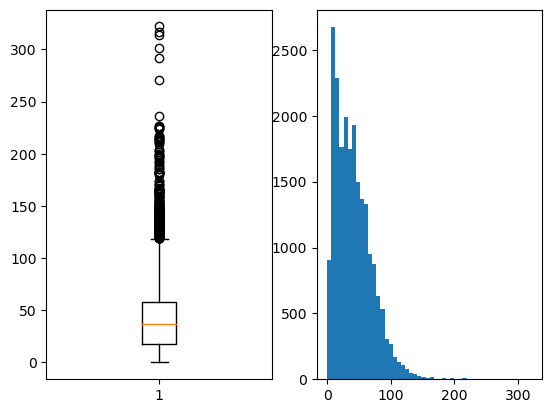

In [12]:
reviews_length = [len(review) for review in df['encoded']]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

In [13]:
print(df['encoded'][9917])

[375, 741, 127, 237, 24324, 5, 112, 1683, 358, 363, 15481, 44, 926, 50, 146, 1008, 13204, 27]


In [14]:
documents = df['filtered_outline'].to_numpy()

tfidfVectorizer = TfidfVectorizer()
tfidfMatrix = tfidfVectorizer.fit_transform(documents)
similarity = cosine_similarity(tfidfMatrix, tfidfMatrix)

outlineToIndex = dict(zip(documents, df.index))
idx = outlineToIndex[documents[3791]]

def recommendations(outline, similarity=similarity):
    index = outlineToIndex[outline]
    scores = list(enumerate(similarity[index]))
    scores = sorted(scores, key=lambda x:x[1], reverse=True)

    scores = scores[1:11]
    webtoon_index = [idx[0] for idx in scores]

    return df['outline'].iloc[webtoon_index]

recommendations(documents[9917])


9916     1부 _ 공주라 불리는 학교의...
15776    저주에 걸린 공주를 구한 왕자...
10020    공주님을 구하러 온 왕자님이 ...
17255    어린시절부터 완벽한 왕자님과의...
20926    변방의 소국인 아이지나에는 희...
3306     아가씨 학교의 숙녀 정숙을 벗...
16711    페르시아의 왕자와 신라 공주의...
7486     히로인이 어울리지 않는다는 건...
16476    아이돌의 아이돌에 의한 아이돌...
5377     자신의 능력이 비범함을 알고 ...
Name: outline, dtype: object

In [15]:
print(df['outline'][15776])
print(df['outline'][10020])
print(df['outline'][17255])
print(df['outline'][20926])
print(df['outline'][3306])
print(df['outline'][16711])
print(df['outline'][7486])
print(df['outline'][16476])
print(df['outline'][5377])
print(df['title'][9916])
print(df['title'][9917])

저주에 걸린 공주를 구한 왕자 공주와 왕자는 이대로 해피엔딩 진정한 사랑과 운명을 찾아 왕자를 기다리는 레몬 공주의 달콤살벌한 이야기가 펼쳐집니다
공주님을 구하러 온 왕자님이 마녀의 저주로 5살 아이가 돼버렸다 예정 없던 공주님의 육아가 시작되는데 10년 동안 마녀의 탑에 갇혀 자신을 구해줄 왕자님만 기다리던 공주님에게 어느 날 진짜 왕자님이 찾아왔다 행복한 미래를 그리며 함께 성 밖을 나서는 순간 마녀의 저주로 왕자님은 5살 아이가 되어버리고 왕자님을 최고의 남편감으로 키우기 위한 공주님의 왕자 육성 프로젝트가 시작된다
어린시절부터 완벽한 왕자님과의 만남을 꿈꿔온 공주님 공지우 그녀는 학교 최고의 아이돌 연예계 데뷔를 앞두고 있는 한태준에게 고백할 찬스만 노리고 있었다 하지만 예상 못한 뒷걸음질 도중 생각하지도 못했던 인물에게 질투를 불태우게 되는데 상큼 발랄 틴에이지 학원 순정물
변방의 소국인 아이지나에는 희대의 난봉꾼인 메이브 공주가 산다 메이브 공주는 어느날 그란고의 칼린 왕자와 하룻밤을 보내게 되고 그가 왕자가 아닌 공주라는 비밀을 알게 되는데
아가씨 학교의 숙녀 정숙을 벗어던지고 아이돌로 인기 아이돌과 전 인기 아이돌 두 소녀의 성장통 이야기 톱 아이돌 그것은 1년에 한 번 열리는 최강결정전 에서 우승한 아이돌을 말한다 과거 엄청난 인기를 자랑했지만 아이돌 꿈이 좌절됐던 소녀 히메미야 사쿠라코와 소속사 없이 착실하게 공연을 소화해내는 신인 아이돌 와카나 아루미 숙녀가 다니는 아가씨 학교에서 만난 두 사람이 톱 아이돌을 목표로 두는 순간 노래 춤 비주얼 카리스마 모든 걸 건 뜨거운 전투가 시작된다ㅡ
페르시아의 왕자와 신라 공주의 사랑과 모험의 이야기
히로인이 어울리지 않는다는 건 내가 제일 잘 알아 타키구치 요이는 단정한 외모에 스마트한 매너로 왕자님이라 불리는 여자아이 순정만화의 히어로 같다며 동경의 대상이 되지만 정작 본인의 심정은 복잡해져만 간다 그러던 중 우연히 만난 사람은 역시왕자님이라 불리는 한 살 연상의 남자 이치무라 선배 그의 조금은 무